#**1. Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Reading Dataset**

In [2]:
df = pd.read_csv('/content/sample_data/onlinefoods.csv')

**A) Looking at top 10 records**

In [3]:
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


**B) Understanding our dataset, by looking at the number of Rows & Columns and the Datatype and record count of each Column**

In [4]:
df.shape

(388, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


# **3. Data Preprocessing**

**A) Checking Null values, if any**

In [6]:
null_values = df.isnull().sum()

# To display the count of null values for each column
print(null_values)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


**B) Dropping unwanted columns**

In [7]:
df = df.drop(['Unnamed: 12'], axis=1)

# **4. Exploratory Data Analysis**

**A) Summary statistics of our dataset**

In [8]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


**B) Creating plots to analyze our Dataset**

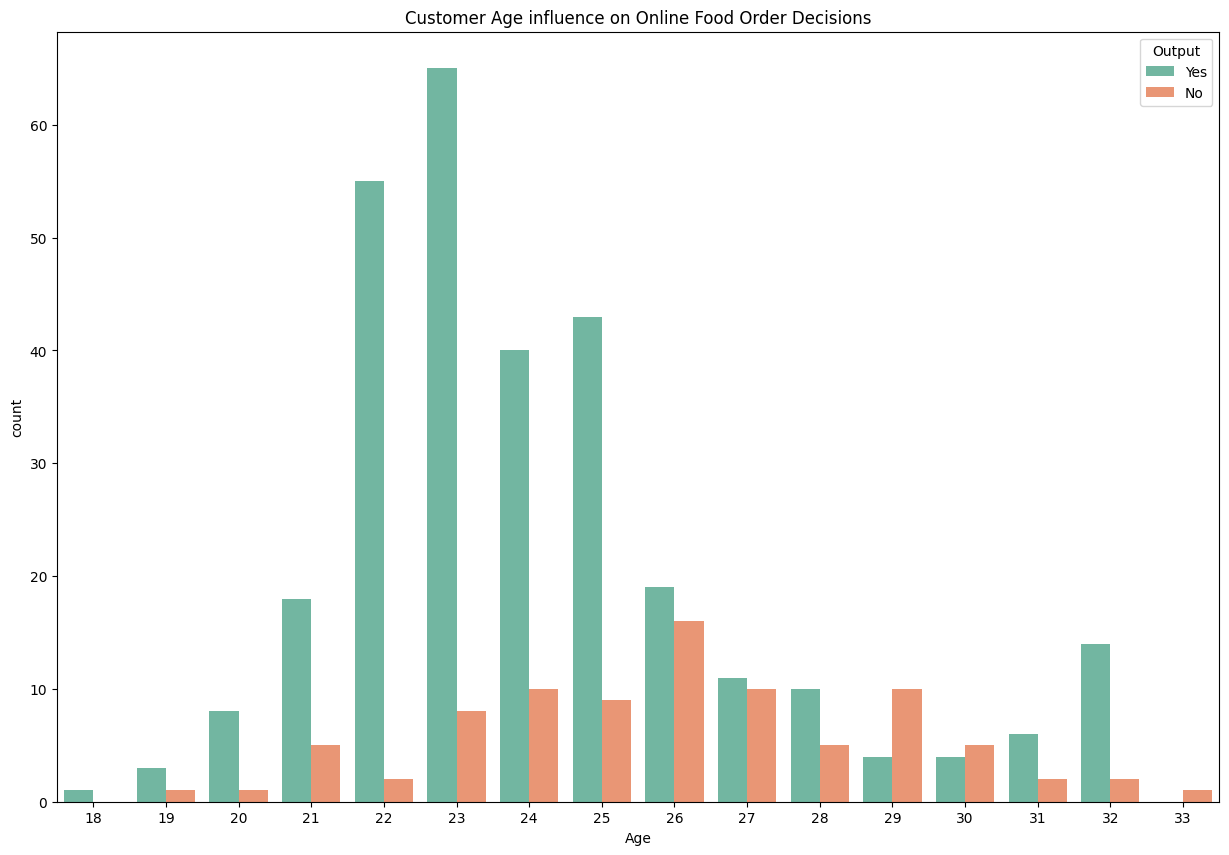

In [9]:
plt.figure(figsize=(15, 10))
plt.title("Customer Age influence on Online Food Order Decisions")
sns.countplot(x='Age',data=df,hue='Output',palette="Set2")
plt.show()

**C) Extracting subset of data who have Ordered food, to analyze with various features in our dataset**

In [10]:
ordered_food = df.query("Output == 'Yes'")
ordered_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


**D) Creating Pie charts to understand influence of key features on Food ordering**

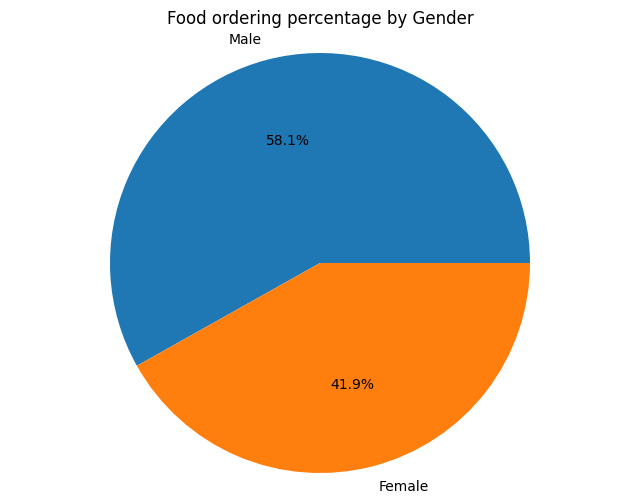

In [11]:
OrderCountByGender = ordered_food["Gender"].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))  # Set figure size
plt.pie(OrderCountByGender, labels=OrderCountByGender.index, autopct='%1.1f%%')
plt.title('Food ordering percentage by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

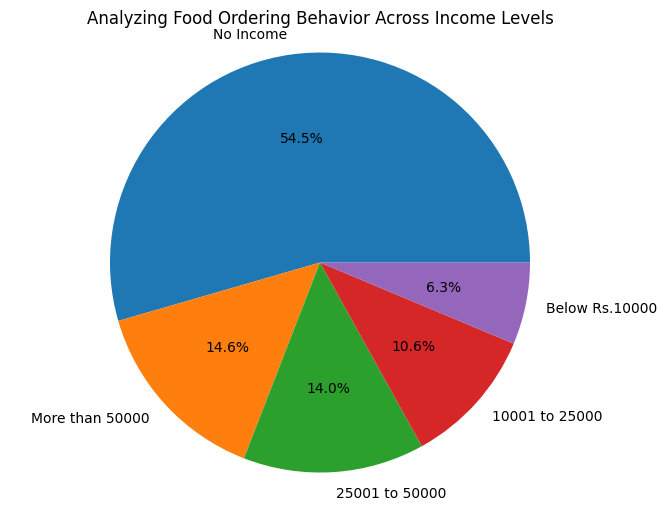

In [12]:
# Calculate monthly income counts
monthly_income_counts = ordered_food["Monthly Income"].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))  # Set figure size
plt.pie(monthly_income_counts, labels=monthly_income_counts.index, autopct='%1.1f%%')
plt.title('Analyzing Food Ordering Behavior Across Income Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**E) Creating Histograms to understand the data distribution among few features**

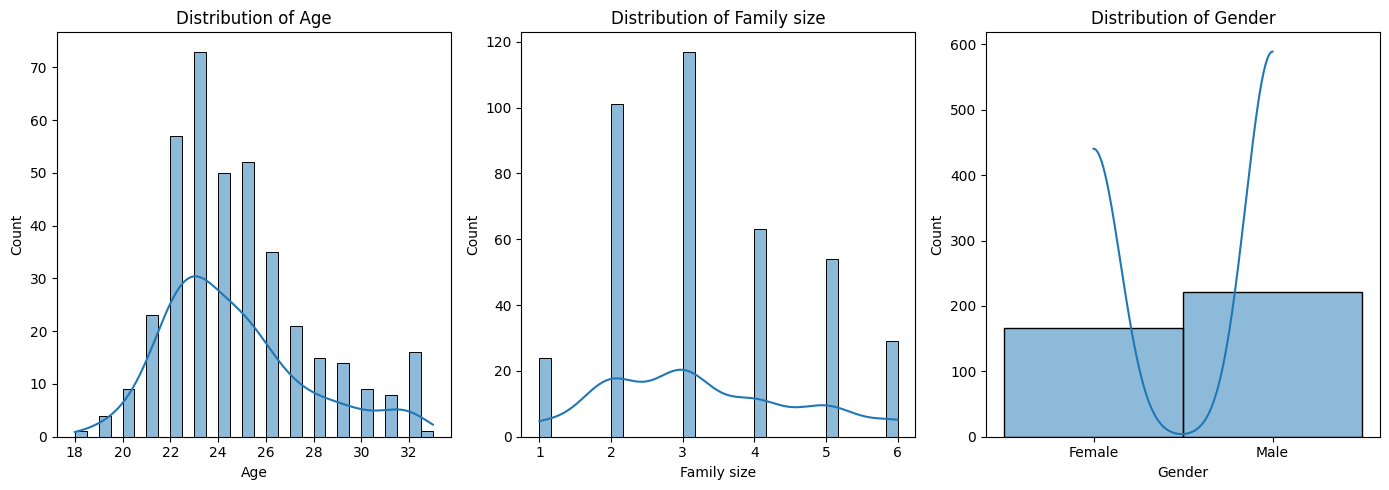

In [13]:
# Let's visualize the distribution of some key features

# List of features for EDA
features_to_plot = ['Age', 'Family size','Gender']

# Plotting the distribution of features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

for i, col in enumerate(features_to_plot):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i]).set_title(f'Distribution of {col}')

# Adjust the layout
plt.tight_layout()
plt.show()

In [14]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object

**D) Checking various Categorical column's unique labels record counts, to understand the distribution and help in converting those values to numerical data**

In [15]:
print('Gender Counts: ', df['Gender'].value_counts())
print('-----------')
print('Marital Status Counts: ', df['Marital Status'].value_counts())
print('-----------')
print('Occupation counts: ', df['Occupation'].value_counts())
print('-----------')
print('Monthly Income counts: ', df['Monthly Income'].value_counts())
print('-----------')
print('Educational Qualifications counts: ', df['Educational Qualifications'].value_counts())
print('-----------')
print('Feedback counts: ', df['Feedback'].value_counts())

Gender Counts:  Male      222
Female    166
Name: Gender, dtype: int64
-----------
Marital Status Counts:  Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64
-----------
Occupation counts:  Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64
-----------
Monthly Income counts:  No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64
-----------
Educational Qualifications counts:  Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64
-----------
Feedback counts:  Positive     317
Negative      71
Name: Feedback, dtype: int64


# **5. Data Preparation - Converting categorical data to numerical data**

In [16]:
df["Gender"] = df["Gender"].map({"Male":0,"Female":1}) # male or female

df["Marital Status"] = df["Marital Status"].map({"Married":0,"Single":1,"Prefer not to say":2})


df["Occupation"] = df["Occupation"].replace(to_replace=["Employee","Self Employeed"], value=1) # employed
df["Occupation"] = df["Occupation"].replace(to_replace=["Student","House wife"], value=0) # unemployed


df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})


df["Monthly Income"] = df["Monthly Income"].replace(to_replace=["No Income"], value=0) # no income
df["Monthly Income"] = df["Monthly Income"].replace(to_replace=["Below Rs.10000",
                                                                   "More than 50000",
                                                                   "25001 to 50000",
                                                                   "10001 to 25000"], value=1)  # has an income

df["Feedback"] = df["Feedback"].map({"Negative ":0,"Positive":1}) # negative or positive

df["Output"] = df["Output"].map({"No":0,"Yes":1}) # no or yes

In [17]:
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,1,1,0,0,2,4,12.9766,77.5993,560001,1,1
1,24,1,1,0,1,1,3,12.9770,77.5773,560009,1,1
2,22,0,1,0,1,2,3,12.9551,77.6593,560017,1,0
3,22,1,1,0,0,1,6,12.9473,77.5616,560019,1,1
4,22,0,1,0,1,2,4,12.9850,77.5533,560010,1,1
5,27,1,0,1,1,2,2,12.9299,77.6848,560103,1,1
6,22,0,1,0,0,1,3,12.9770,77.5773,560009,1,1
7,24,1,1,0,0,2,3,12.9828,77.6131,560042,1,1
8,23,1,1,0,0,2,2,12.9766,77.5993,560001,1,1
9,23,1,1,0,0,2,4,12.9854,77.7081,560048,1,1


**A) Creating Correlation matix to understand the relationship between various variables in our dataset and also its influence on out target variable**

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Gender'),
 Text(2.5, 0, 'Marital Status'),
 Text(3.5, 0, 'Occupation'),
 Text(4.5, 0, 'Monthly Income'),
 Text(5.5, 0, 'Educational Qualifications'),
 Text(6.5, 0, 'Family size'),
 Text(7.5, 0, 'latitude'),
 Text(8.5, 0, 'longitude'),
 Text(9.5, 0, 'Pin code'),
 Text(10.5, 0, 'Output'),
 Text(11.5, 0, 'Feedback')]

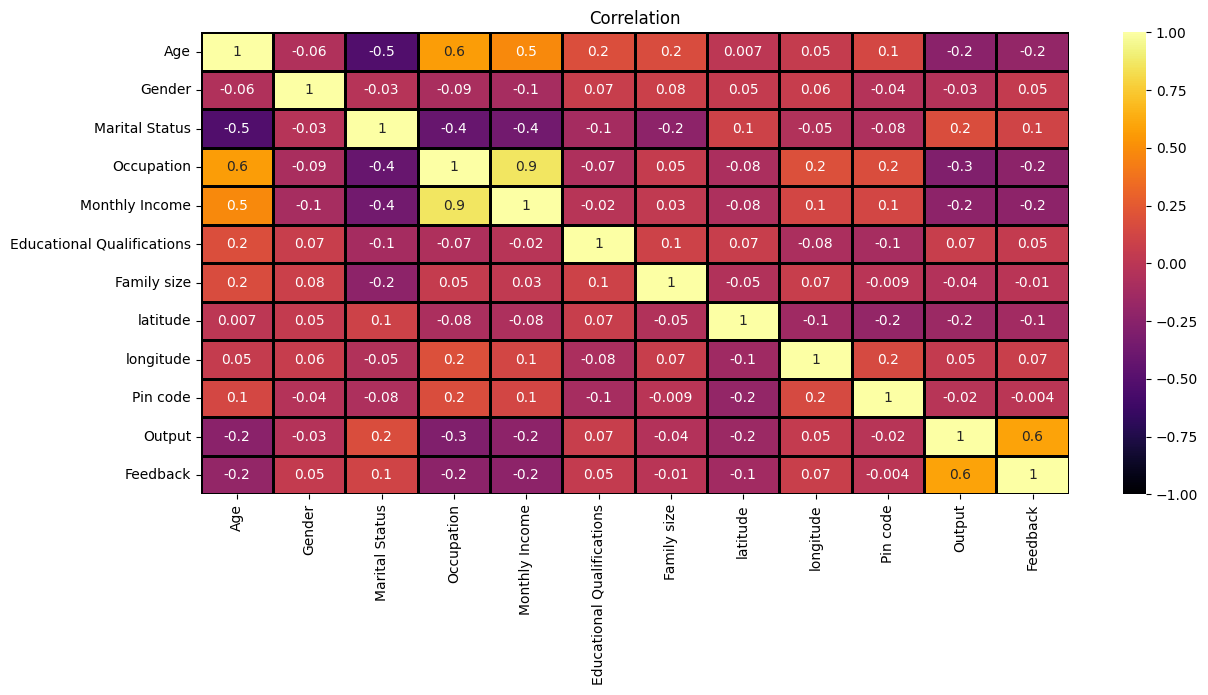

In [18]:
corr_df = df.corr(method="pearson")

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# **6. Model Training**

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**A) Splitting data into Train and Test sets**

In [20]:
X = df.drop('Output',axis=1)
y = df['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                    random_state=101)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (291, 11)
Shape of test dataset :  (97, 11)


**B) Random Forest Classifier model**

In [21]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestAccuracy = rfc.score(X_test, y_test)
print("Accuracy:", RandomForestAccuracy)

Accuracy: 0.8865979381443299


**C) Logistic Regression model**



In [22]:
# Initialize and train Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the classifier
LogisticRegressionAccuracy = log_reg.score(X_test, y_test)
print("Accuracy:", LogisticRegressionAccuracy)

Accuracy: 0.7731958762886598


# **7. Comparing Test results**

**A) Confusion matrix created based on Predictions made using Random Forest classifier model**

In [23]:
# Optionally, print confusion matrix
y_pred = rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Random Forest classifier:")
print(conf_matrix)

Confusion Matrix Random Forest classifier:
[[16  6]
 [ 5 70]]


**B) Confusion matrix created based on Predictions made using Logistic Regression model**

In [24]:
# Optionally, print confusion matrix
y_pred1 = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred1)

print("Confusion Matrix Logistic Regression:")
print(conf_matrix)

Confusion Matrix Logistic Regression:
[[ 0 22]
 [ 0 75]]


**C) Evaluating score by cross-validation**

In [25]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
scores = cross_val_score(rfc, X_train, y_train,cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.9037405026300409 0.047047021260004554


In [26]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
scores = cross_val_score(log_reg, X_train, y_train,cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.7766218585622443 0.0030391583869082694


# **------------------------------ END ----------------------------------**